<a href="https://colab.research.google.com/github/tomasvicente20002/SistemasRecomendacao/blob/main/AppRecommender_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Montar o Google Drive no Colab**


In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Carregar a base de dados

O Steam é o hub de jogos para PC mais popular do mundo. Com uma enorme coleção que inclui de tudo, desde blockbusters AAA a pequenos títulos independentes.

Este conjunto de dados é uma lista de *comportamentos* do usuário, com colunas: ID do usuário, Título do jogo, Tipo de comportamento (comprado ou jogado), Horas ('purchase' = 1 e ´play' representa o número de horas que o usuário jogou o game).

Esse conjunto de dados é gerado inteiramente a partir de dados públicos do Steam.

**Atenção**:
O ficheiro de dados foi salvo na pasta *Colab Notebooks*, entretanto pode ser salvo onde lhe apetecer

In [ ]:
headers = ['Id_user','Game','Behavior','Time','0']

data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/steam200k ma.csv',sep=';',names=headers)
data=data.drop(['0'], axis=1)

# Mostrar a tabela ordenada por Game

sort_values - ordenar

head(10) - Esta função retorna as primeiras 10 linhas para o objeto com base na posição.

É útil para testar rapidamente se o seu objeto possui o tipo certo de dados.

Experimente:

(1) Ordenar por ´Time', 'Id_user' ou 'Behavior'

(2) Trocar a função head() pela função tail() - esta retorna as últimas *n* linhas

In [ ]:
data.sort_values(by=['Game'],inplace=True)
data.head(10)

,Id_user,Game,Behavior,Time
63495,46055854,007 Legends,play,0.7
63494,46055854,007 Legends,purchase,1.0
193276,93030550,0RBITALIS,purchase,1.0
112168,11940338,0RBITALIS,purchase,1.0
59129,86055705,0RBITALIS,purchase,1.0
112169,11940338,0RBITALIS,play,0.6
59130,86055705,0RBITALIS,play,0.3
193277,93030550,0RBITALIS,play,0.3
98805,35701646,1... 2... 3... KICK IT! (Drop That Beat Like a...,purchase,1.0
166438,50818751,1... 2... 3... KICK IT! (Drop That Beat Like a...,purchase,1.0


# Informação inicial dos dados


Ver a dimensão do DataFrame.

shape - retorne uma tupla representando a dimensionalidade do DataFrame.

In [ ]:
print ( 'Configuração da tabela:' ,  data.shape )

Configuração da tabela: (199975, 4)


Contar o número de usuários: usar nunique().

Experimente contar o número de games também.

In [ ]:
print ( 'Usuários únicos no conjunto de dados:' ,  data.Id_user.nunique ())

Usuários únicos no conjunto de dados: 12393


In [ ]:
print ( 'Jogos exclusivos no conjunto de dados:' ,  data.Game.nunique ())

Jogos exclusivos no conjunto de dados: 5152


Verificar se existem linhas duplicadas e, caso existam, removê-las.

In [ ]:
data=data.drop_duplicates()
data.head(5)

,Id_user,Game,Behavior,Time
63495,46055854,007 Legends,play,0.7
63494,46055854,007 Legends,purchase,1.0
193276,93030550,0RBITALIS,purchase,1.0
112168,11940338,0RBITALIS,purchase,1.0
59129,86055705,0RBITALIS,purchase,1.0


In [ ]:
print ( 'Configuração após remoção de dados duplicados:' ,  data.shape )

Configuração após remoção de dados duplicados: (199268, 4)


# Separar por **Behavior** e gerar tabela apenas com dados válidos

Contar quantos usuários possuem **'Behavior' = 'play'.**

In [ ]:
data_play=data[(data['Behavior'] =='play')]
count_play=data_play.Behavior.count()
print('Play:', count_play)

Play: 70480


Contar quantos usuários possuem **'Behavior' = 'purchase'.**

In [ ]:
data_purchase=data[(data['Behavior'] =='purchase')]
count_purchase=data_purchase.Behavior.count()
print('Purchase:', count_purchase)

Purchase: 128788


Verificar se existem usuários que não estão com **nenhum valor para 'Behavior'.**

In [ ]:
print('Usuarios sem Behavior:', data.Id_user.count() - (count_play + count_purchase))

Usuarios sem Behavior: 0


Se houver usuários nesta situação, o melhor é excluir as linhas destes usuários.

Vamos juntar estes dois DataFrames contendos os dados 'play e 'purchase', utilizando 'concat'.

In [ ]:
data_valid=pd.concat([data_play,data_purchase])
print('Dimensao dos dados validos:', data_valid.shape)

Dimensao dos dados validos: (199268, 4)


Outra forma de unir os DataFrames é através do append(), ou seja, juntar 'purchase' em 'play'.

Neste caso, deve-se ignorar o rótulo do DataFrame que está sendo anexado: o 'purchase'.

In [ ]:
data_valid1 = data_play.append(data_purchase, ignore_index=True)
print('Dimensao dos dados validos - utilizando append:', data_valid1.shape)

Dimensao dos dados validos - utilizando append: (199268, 4)


# Como se distribui as horas jogadas pelos games

**Quantos games com Behavior='play' tem mais de 10 horas jogadas.**

shape() retorna uma tupla: (linhas, colunas) do DataFrame.

Interessa apenas o nº de linhas, por isso utilizaremos shape[0]

In [ ]:
up_10 = data_play[data_play['Time'] > 10].shape[0]
print('Acima de 10 horas de jogo:', up_10)

Acima de 10 horas de jogo: 25290


In [ ]:
up_50 = data_play[data_play['Time'] > 50].shape[0]
print('Acima de 50 horas de jogo:', up_50)

Acima de 50 horas de jogo: 9419


In [ ]:
down_10 = data_play[data_play['Time'] <= 10].shape[0]
print('Abaixo de 10 horas de jogo:', down_10)

Abaixo de 10 horas de jogo: 45190


# Listar os Jogos, com mais de 10h de jogo em média, por ordem decrescente

Mas quais são os games com mais de 10 horas jogadas por um determinado jogador?

Vamos selecionar estes games e exibi-los, inicialmente SOMANDO o número de horas jogadas por cada um dos usuários.

Os dados serão exibidos agrupados por 'Game' e 'Time'


In [ ]:
data_select_sum = data_play[(data_play['Time'] > 10.0)]
data_select_sum = data_select_sum.groupby("Game")["Time"].sum()
data_select_sum.sort_values(ascending=False)

Game
Dota 2                             974928.6
Counter-Strike Global Offensive    321523.4
Team Fortress 2                    170211.1
Counter-Strike                     133522.4
Sid Meier's Civilization V          99298.1
                                     ...   
DEFCON                                 10.2
Ballad of Solar                        10.1
Intrusion 2                            10.1
Piercing Blow                          10.1
Warhammer 40,000 Armageddon            10.1
Name: Time, Length: 1692, dtype: float64


Vamos visulaizar agora a MEDIA e não o somatório.

A média altera completamente o resultado apresentado anteriormente.

In [ ]:
data_select_mean = data_play[(data_play['Time'] > 10.0)]
data_select_mean = data_select_mean.groupby("Game")["Time"].mean()
data_select_mean.sort_values(ascending=False)

Game
Eastside Hockey Manager        1295.0
Battle Nations                 1047.0
Sigils of Elohim                888.0
Prime World                     672.0
Out of the Park Baseball 16     652.0
                                ...  
Mars War Logs                    10.2
Intrusion 2                      10.1
Piercing Blow                    10.1
Ballad of Solar                  10.1
Warhammer 40,000 Armageddon      10.1
Name: Time, Length: 1692, dtype: float64

.

Podemos também usar uma pivot_table: uma tabela dinâmica no estilo de planilha como um DataFrame, para apresentar a média.


In [ ]:
data_select_mea = data_play[(data_play['Time'] > 10.0)]
mean_hours = data_select_mea.pivot_table('Time', columns='Game', aggfunc='mean').T
mean_hours.sort_values(by='Time',ascending=False)

,Time
Game,
Eastside Hockey Manager,1295.0
Battle Nations,1047.0
Sigils of Elohim,888.0
Prime World,672.0
Out of the Park Baseball 16,652.0
...,...
Mars War Logs,10.2
Intrusion 2,10.1
Piercing Blow,10.1


# Melhor que tabela é ver graficamente!

O gráfico de barras horizontais (barh) exibe 10 Games com mais de 10h jogadas/usuário (SOMA), por ordem descendente.

Experimente: Mudar o tamanho da figura, o tipo de gráfico ('bar', ´pie'), o número de jogos.

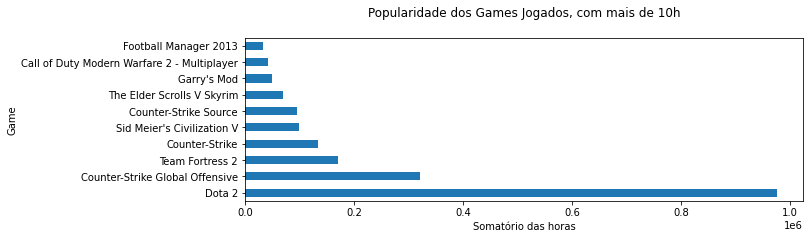

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,3))
plt.title('Popularidade dos Games Jogados, com mais de 10h\n')
plt.xlabel('Somatório das horas')
data_select_sum.sort_values(ascending=False)[:10].plot(kind='barh')
plt.show()

Agora vamos plotar o gráfico dos **games com as melhores médias de horas jogadas**.

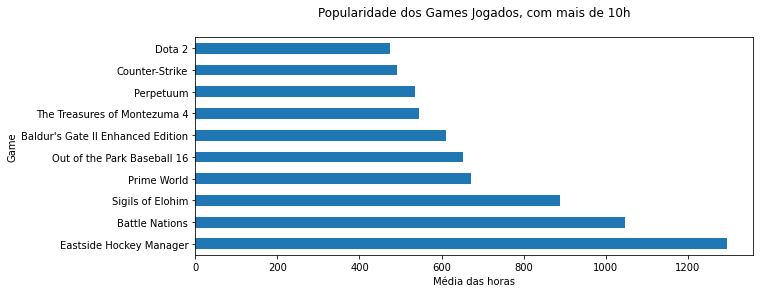

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,4))
plt.title('Popularidade dos Games Jogados, com mais de 10h\n')
plt.xlabel('Média das horas')
data_select_mean.sort_values(ascending=False)[:10].plot(kind='barh')

plt.show()

Quer **salvar** este gráfico como imagem? É fácil!

ANTES de plt.show() inclua a linha plt.savefig('PopularidadeGames.png')  

# Estatísticas por Behavior

describe ( ) - Para os dados numéricos, são exibidas as estatísticas para cada coluna numérica do DataFrame, como contagem de valores, soma, média, mediana, mínimo, máximo e os percentis 25, 50 e 75%. O percentil 50 é o mesmo que a mediana.

Neste conjunto de dados é possível observar que 12393 usuários compraram em média 10 jogos e que uma única pessoa comprou 1068 jogos.


In [ ]:
purchased = data_purchase.groupby('Id_user')['Time'].sum()
print('Estatísticas de compra de jogos por usuários\n',purchased.describe())

Estatísticas de compra de jogos por usuários
 count    12393.000000
mean        10.391995
std         35.628412
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       1068.000000
Name: Time, dtype: float64


Vamos agora agrupar: somatório dos tempos por Usuário e Game.


In [ ]:
played = data_play.groupby(['Id_user','Game'])['Time'].sum()
played

Id_user    Game                        
5250       Alien Swarm                       4.9
           Cities Skylines                 144.0
           Deus Ex Human Revolution         62.0
           Dota 2                            0.2
           Portal 2                         13.6
                                           ...  
309434439  Dota 2                            0.8
309554670  Mitos.is The Game                 5.9
309626088  Age of Empires II HD Edition      6.7
309824202  Dota 2                            0.7
309903146  Dota 2                            0.2
Name: Time, Length: 70468, dtype: float64

Vamos à estatística:

As pessoas jogaram juntas 70469 horas, com uma média acima de 48 horas/game.

Um único usuário jogou mais de 11700 horas, ou seja, quase 490 dias!

In [ ]:
print('\nEstatísticas de games jogados\n',played.describe())


Estatísticas de games jogados
 count    70468.000000
mean        48.892223
std        229.367979
min          0.100000
25%          1.000000
50%          4.500000
75%         19.100000
max      11754.000000
Name: Time, dtype: float64


# Análise de jogos ('play' e 'purchase') com os usuários


Contar o **número de compras para o Behavior='purchased'.**

Agrupar pela contagem de vezes que foi comprado.

In [ ]:
num_games = 5

game_purch = data_valid.loc[data_valid['Behavior'] == 'purchase']
hours_purch = game_purch.groupby('Game')['Game'].agg('count').sort_values(ascending=False)
hours_purch = pd.DataFrame({'Game': hours_purch.index, 'Número de Compras': hours_purch.values})[0:num_games]
print(hours_purch)

                              Game  Número de Compras
0                           Dota 2               4841
1                  Team Fortress 2               2323
2                         Unturned               1563
3  Counter-Strike Global Offensive               1412
4           Half-Life 2 Lost Coast                981


Contar o** número de compras para o Behavior='play**'

Agrupar pela quantidade de horas (somatório) que o game foi jogado.

In [ ]:
game_play = data_valid.loc[data_valid['Behavior'] == 'play']
hours_play = game_play.groupby('Game')['Time'].agg(np.sum).sort_values(ascending=False)
hours_play = pd.DataFrame({'Game': hours_play.index, 'Horas Jogadas': hours_play.values})[0:num_games]
print(hours_play)

                              Game  Horas Jogadas
0                           Dota 2       981684.6
1  Counter-Strike Global Offensive       322771.6
2                  Team Fortress 2       173673.3
3                   Counter-Strike       134261.1
4       Sid Meier's Civilization V        99821.3


# Colocar estes dados num gráfico
Plotar o gráfico usando seaborn, que é uma biblioteca de visualização de dados Python baseada no matplotlib . Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

Inicialmente é traçado quantas vezes cada jogo é comprado.

Depois, quantas horas é jogado para ver se os jogos mais comprados são os mais jogados.

Vamos usar os dados com as linhas duplicadas e os valores inválidos já excluidos: data_valid.

Serão 2 gráficos lado a lado.

plt.subplots(): os parâmetros (1,2) significa que estamos criando uma figura com 1 linha e 2 colunas

O gráfico é do tipo de barra 'barplot'.


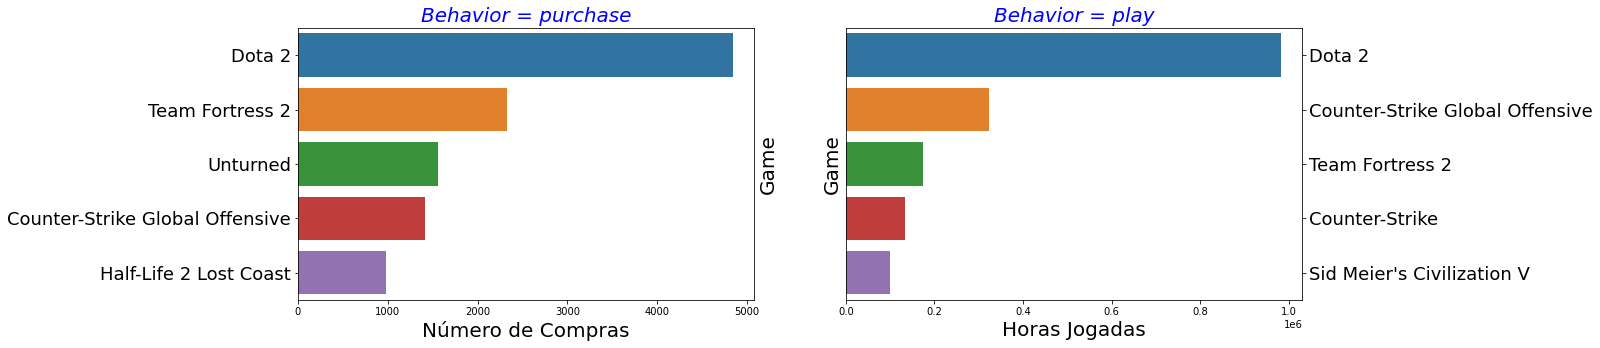

In [ ]:
import seaborn as sns
fig, ax =plt.subplots(1,2,figsize=(18,num_games))
sns.barplot(y = 'Game', x = 'Número de Compras', data = hours_purch, ax=ax[0])
sns.barplot(y = 'Game', x = 'Horas Jogadas', data = hours_play, ax=ax[1])

ax[1].yaxis.tick_right() #movendo as marcações para a direita, no gráfico 2
ax[0].yaxis.set_label_position("right") #movendo o label a direita, no gráfico 1

for i in range(0,2): #definindo o tamanho dos labels
    ax[i].tick_params(axis='y', labelsize=18)
    ax[i].xaxis.label.set_size(20)
    ax[i].yaxis.label.set_size(20)

ax[0].set_title('Behavior = purchase', fontsize=20, fontweight=0, color='blue', style='italic')
ax[1].set_title('Behavior = play',fontsize=20, fontweight=0, color='blue', style='italic')
plt.savefig('analise de jogos.png') #salvando o gráfico como imagem

# Dados estatísticos de cada Game X Time

Agrupar as horas para cada Game.

In [ ]:
data_valid.groupby("Game")["Time"].describe()

,count,mean,std,min,25%,50%,75%,max
Game,,,,,,,,
007 Legends,2.0,0.850000,0.212132,0.7,0.775,0.85,0.925,1.0
0RBITALIS,6.0,0.700000,0.346410,0.3,0.375,0.80,1.000,1.0
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),12.0,2.250000,3.073789,0.2,1.000,1.00,1.500,11.2
10 Second Ninja,8.0,1.487500,1.590541,0.5,1.000,1.00,1.000,5.4
"10,000,000",2.0,2.300000,1.838478,1.0,1.650,2.30,2.950,3.6
...,...,...,...,...,...,...,...,...
sZone-Online,160.0,0.991875,0.757269,0.1,0.950,1.00,1.000,6.7
samurai_jazz,1.0,1.000000,NaN,1.0,1.000,1.00,1.000,1.0
the static speaks my name,21.0,0.714286,0.381164,0.1,0.300,1.00,1.000,1.0


# Matriz completa dos tempos para  'Behavior'='play'

**Horas jogadas por cada usuário em cada um dos games.**

A matriz é similar a esta apresentada anteriormente.

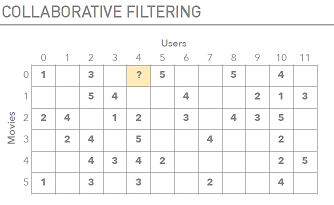

In [ ]:
time_data=data_play.pivot_table('Time', index='Id_user', columns='Game').T
time_data

Id_user,5250,76767,86540,144736,181212,229911,298950,381543,547685,554278,...,309228590,309255941,309262440,309265377,309404240,309434439,309554670,309626088,309824202,309903146
Game,,,,,,,,,,,,,,,,,,,,,
007 Legends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0RBITALIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Second Ninja,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"10,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rymdkapsel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sZone-Online,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
the static speaks my name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A matriz tem muito NaN, ou seja, Not a Number, logo vamos substituí-los por zero.

In [ ]:
time_data=time_data.fillna(0).round(1)
time_data

Id_user,5250,76767,86540,144736,181212,229911,298950,381543,547685,554278,...,309228590,309255941,309262440,309265377,309404240,309434439,309554670,309626088,309824202,309903146
Game,,,,,,,,,,,,,,,,,,,,,
007 Legends,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0RBITALIS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Second Ninja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"10,000,000",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rymdkapsel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sZone-Online,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the static speaks my name,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Recomendações

Suponha que queremos** recomendar um game a um jogador x. **

Entre outros usuários, nós procuramos alguém que seja similar ao jogador x em games que x joga muito.

Quando encontramos alguém semelhante, podemos ver que outros games que a pessoa gosta e recomenda esses games para
usuário x.

Considere a matriz 'time_data' apresentada anteriormente. As células com NaN significa que o tempo de jogo inexiste.

Queremos, por exemplo, estimar o tempo do usuário x no game Y.

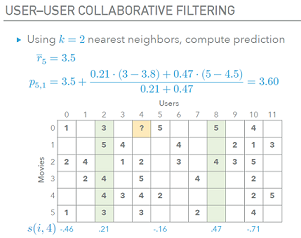
# Vamos à ideia do Vizinho mais próximo



Vamos procurar **quais 'Game' um determinado 'Id_user' joga e por quantas horas**

In [ ]:
steam= data_play
Id_user=93030550
near_user = steam.loc[steam['Id_user']==Id_user]

Vamos usar 'pd.Series', para ter um array unidimensional com rótulos (no caso, games) de eixo.

OBS.: Um exemplo de um objeto Series é uma coluna de um DataFrame.

In [ ]:
near_user_series = pd.Series(near_user['Time'].values, index=near_user['Game'])
near_user_series

Game
0RBITALIS                        0.3
Democracy 3                      6.3
Dota 2                           2.5
Empire Total War               202.0
From Dust                        6.8
Godus                            9.1
Hearts of Iron III               5.8
Just Cause 2                     9.2
Terraria                         4.7
Total War SHOGUN 2              26.0
Tropico 4                        0.3
Tropico 5                       16.6
Wargame European Escalation      1.1
dtype: float64

Na série **'near_user_series' é possível ver que o usuário não joga **Game='100% Orange Juice'.

Estão vamos criar uma cópia para 'similarity' os usuários jogam este game e por quantas horas.

In [ ]:
Game='100% Orange Juice'
similarity = steam[steam['Game'] == Game].copy()
similarity

,Id_user,Game,Behavior,Time
133898,167815968,100% Orange Juice,play,1.4
55898,197328486,100% Orange Juice,play,35.0
158934,172518437,100% Orange Juice,play,1.9
98314,88525821,100% Orange Juice,play,0.9
122341,152078939,100% Orange Juice,play,31.0
80667,125017535,100% Orange Juice,play,0.7
126608,115996656,100% Orange Juice,play,2.5
20886,93644606,100% Orange Juice,play,3.1
16646,48028873,100% Orange Juice,play,1.8


Vamos criar dois array, inicializados com 0, para calcularmos as similaridades e a média dos tempos deste 9 usuários que jogam "100% Orange Juice".

In [ ]:
similarities = np.zeros(len(similarity))
similarities

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
avg_near = np.zeros(len(similarity))
avg_near

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Descrição do processo de calculo das similaridades

similarities [i]: armazena a similaridade do usuário X  com o usuário Y (que joga '100% Orange Juice'). A similaridade é baseada no tempo de jogo, usando a fórmula do cosseno.

avg_near [i]: armazena a média dos tempos de cada usuário Y (que joga '100% Orange Juice').


In [ ]:
from statistics import *
from scipy.spatial.distance import cosine

for i,user in enumerate(similarity.Id_user): #Percorrer cada um dos 'Id_user' que joga '100% Orange Juice'
    #print('user:', user)
    near_u = steam.loc[steam['Id_user']==user] #games que eles jogam, com os respectivos tempos
    #print (near_u)
    near_u_series = pd.Series(near_u['Time'].values, index=near_u['Game']) #todos os games e tempos, juntos
    #print (near_u_series)

    df = pd.DataFrame({'one': near_user_series - mean(near_user_series), #horas do usuário X no game - sua média de horas jogadas.
                       'two': near_u_series - mean(near_u_series)}) #horas do usuário Y no game - sua média de horas jogadas (Y joga '100% Orange Juice')

    # DataFrame que armazena em duas colunas: 'one' e 'two'

    #print(df.one.fillna(0), df.two.fillna(0))
    similarities[i] = 1-cosine(df.one.fillna(0), df.two.fillna(0))
    #print (similarities[i])
    avg_near[i] = mean(near_u_series)
    #print(avg_near[i])

# Vizinho mais próximo: usuário



In [ ]:
def user_nearest_neighbors(steam, Id_user, Game, k):
    near_user = steam.loc[steam['Id_user']==Id_user]
    near_user_series = pd.Series(near_user['Time'].values, index=near_user['Game'])
    similarity = steam[steam['Game'] == Game].copy()
    similarities = np.zeros(len(similarity))
    avg_near = np.zeros(len(similarity))
    for i,user in enumerate(similarity.Id_user):
        near_u = steam.loc[steam['Id_user']==user]

        near_u_series = pd.Series(near_u['Time'].values, index=near_u['Game'])
        df = pd.DataFrame({'one': near_user_series - mean(near_user_series),
                           'two': near_u_series - mean(near_u_series)})
        similarities[i] = 1-cosine(df.one.fillna(0), df.two.fillna(0))
        avg_near[i] = mean(near_u_series)
    similarity['similarities'] = similarities
    similarity['avg_near'] = avg_near
    return similarity.sort_values('similarities',ascending=False)[:k].copy()

In [ ]:
user_nearest_neighbors(data_play, Id_user=167815968, Game='100% Orange Juice', k=5)

,Id_user,Game,Behavior,Time,similarities,avg_near
133898,167815968,100% Orange Juice,play,1.4,1.000000,47.663333
55898,197328486,100% Orange Juice,play,35.0,0.008185,29.125000
126608,115996656,100% Orange Juice,play,2.5,0.003519,36.981818
98314,88525821,100% Orange Juice,play,0.9,0.003142,24.250000
16646,48028873,100% Orange Juice,play,1.8,0.002713,11.039130


# User-User recommendation

$$ p_{u,i} = \overline{r}_u + \frac{\sum_{u'\in N} s(u,u')(r_{u',i}-\overline{r}_{u'})}{\sum_{u'\in N}|s(u,u')|} $$


Cálculo da média de horas jogadas por um determinado usuário.

In [ ]:
Id_user = 181010210
x=data_play[data_play['Id_user']==Id_user]['Time']
s_mean = x.mean()
s_mean

5.550000000000001

Para este usuário X ('Id_user'), vamos buscar os usuários semelhantes a ele, considerando um determinado jogo ('Game').

Estes parâmetros são passados para 'user_nearest_neighbors', que retorna os K usuários vizinhos e o tempo jogado em tal Game, além do cálculo da similaridade e a média de horas jogadas.

SIMILARIDADE: por representar o cosseno entre vetores, o momento em que os vetores de tempo estão mais próximos, demonstrando máxima similaridade entre si, está quando formam entre si um ângulo de 0º, isto é, quando seu cosseno tem valor 1. Na mesma lógica, apresentam maior "rejeição" entre si quando formam um ângulo de 180º, resultando em um
cosseno de −1. Logo, a cosseno similaridade gera valores no intervalo [−1,1] , tal que -1 representa a máxima incompatibilidade entre os usuários, o valor 0 representa completa indiferença entre os usuários e o valor 1 representa
a máxima similaridade entre os usuários (idênticos).

In [ ]:
Game='100% Orange Juice'
neighbors = user_nearest_neighbors(data_play, Id_user, Game,k=5)
neighbors

,Id_user,Game,Behavior,Time,similarities,avg_near
80667,125017535,100% Orange Juice,play,0.7,0.297335,110.364286
98314,88525821,100% Orange Juice,play,0.9,0.290850,24.250000
126608,115996656,100% Orange Juice,play,2.5,0.275364,36.981818
122341,152078939,100% Orange Juice,play,31.0,0.121560,16.282051
158934,172518437,100% Orange Juice,play,1.9,0.020088,6.639241


# Predição:

Na recomendação baseada em usuários a predição feita para um determinado game a um usuário X é estipulada é baseada na similaridade dos tempos desse usuário com os de todos os usuários que já tenham jogado tal game.

A predição é baseada na média de tempo jogado do usuário X e nos valores obtidos na tabela anterior.

O resultado obtido é o número de horas que o usuário X jogaria o Game.

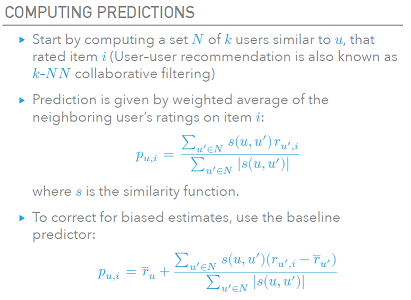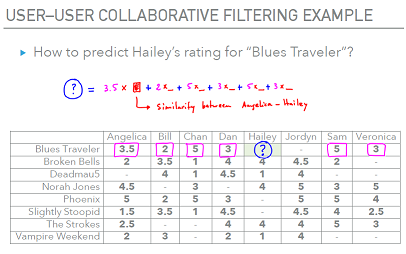


In [ ]:
prediction = s_mean + ((neighbors['Time']-neighbors['avg_near'])*neighbors['similarities']).sum()/neighbors['similarities'].abs().sum()
prediction

-41.40548342518103

Há muita variação no tempo jogado, por isso vamos normalizar os valores em 'Time' e 'avg_near'.

scaler(): Padronizar um conjunto de dados: média e desvio padrão.

In [ ]:
from sklearn.preprocessing import scale
X = scale( neighbors['Time'], axis=0, with_mean=False, with_std=True, copy=True )
X

array([0.05923022, 0.07615314, 0.21153651, 2.62305271, 0.16076775])

In [ ]:
Y = scale( neighbors['avg_near'], axis=0, with_mean=False, with_std=True, copy=True )
Y

array([2.97570313, 0.65384196, 0.99712431, 0.4390057 , 0.17901089])

In [ ]:
prediction_norm = s_mean + ((X-Y)*neighbors['similarities']).sum()/neighbors['similarities'].abs().sum()
prediction_norm

4.568713829141272